<a href="https://colab.research.google.com/github/Moses-bit97/Water-potability/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['water_potability.csv']))
df=df.iloc[1:]

Saving water_potability.csv to water_potability.csv


In [3]:
#display the first five rows of data
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


In [4]:
#display the last five rows of data
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


#EXPLORATORY DATA ANALYSIS

In [5]:
#Checking for missing values
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [6]:
df.isnull().sum()

ph                 490
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

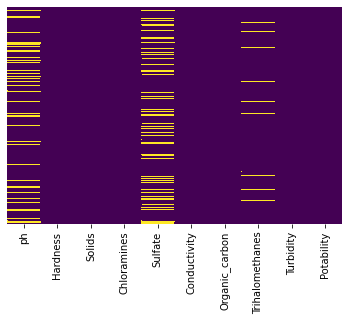

In [7]:
#graphical display of null values 
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap='viridis')

In [8]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

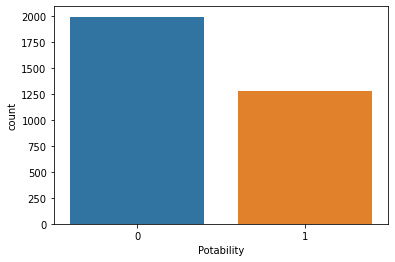

In [10]:
#display target variable, whether portable (1) or not portable (0)
sns.countplot(x='Potability',data=df)

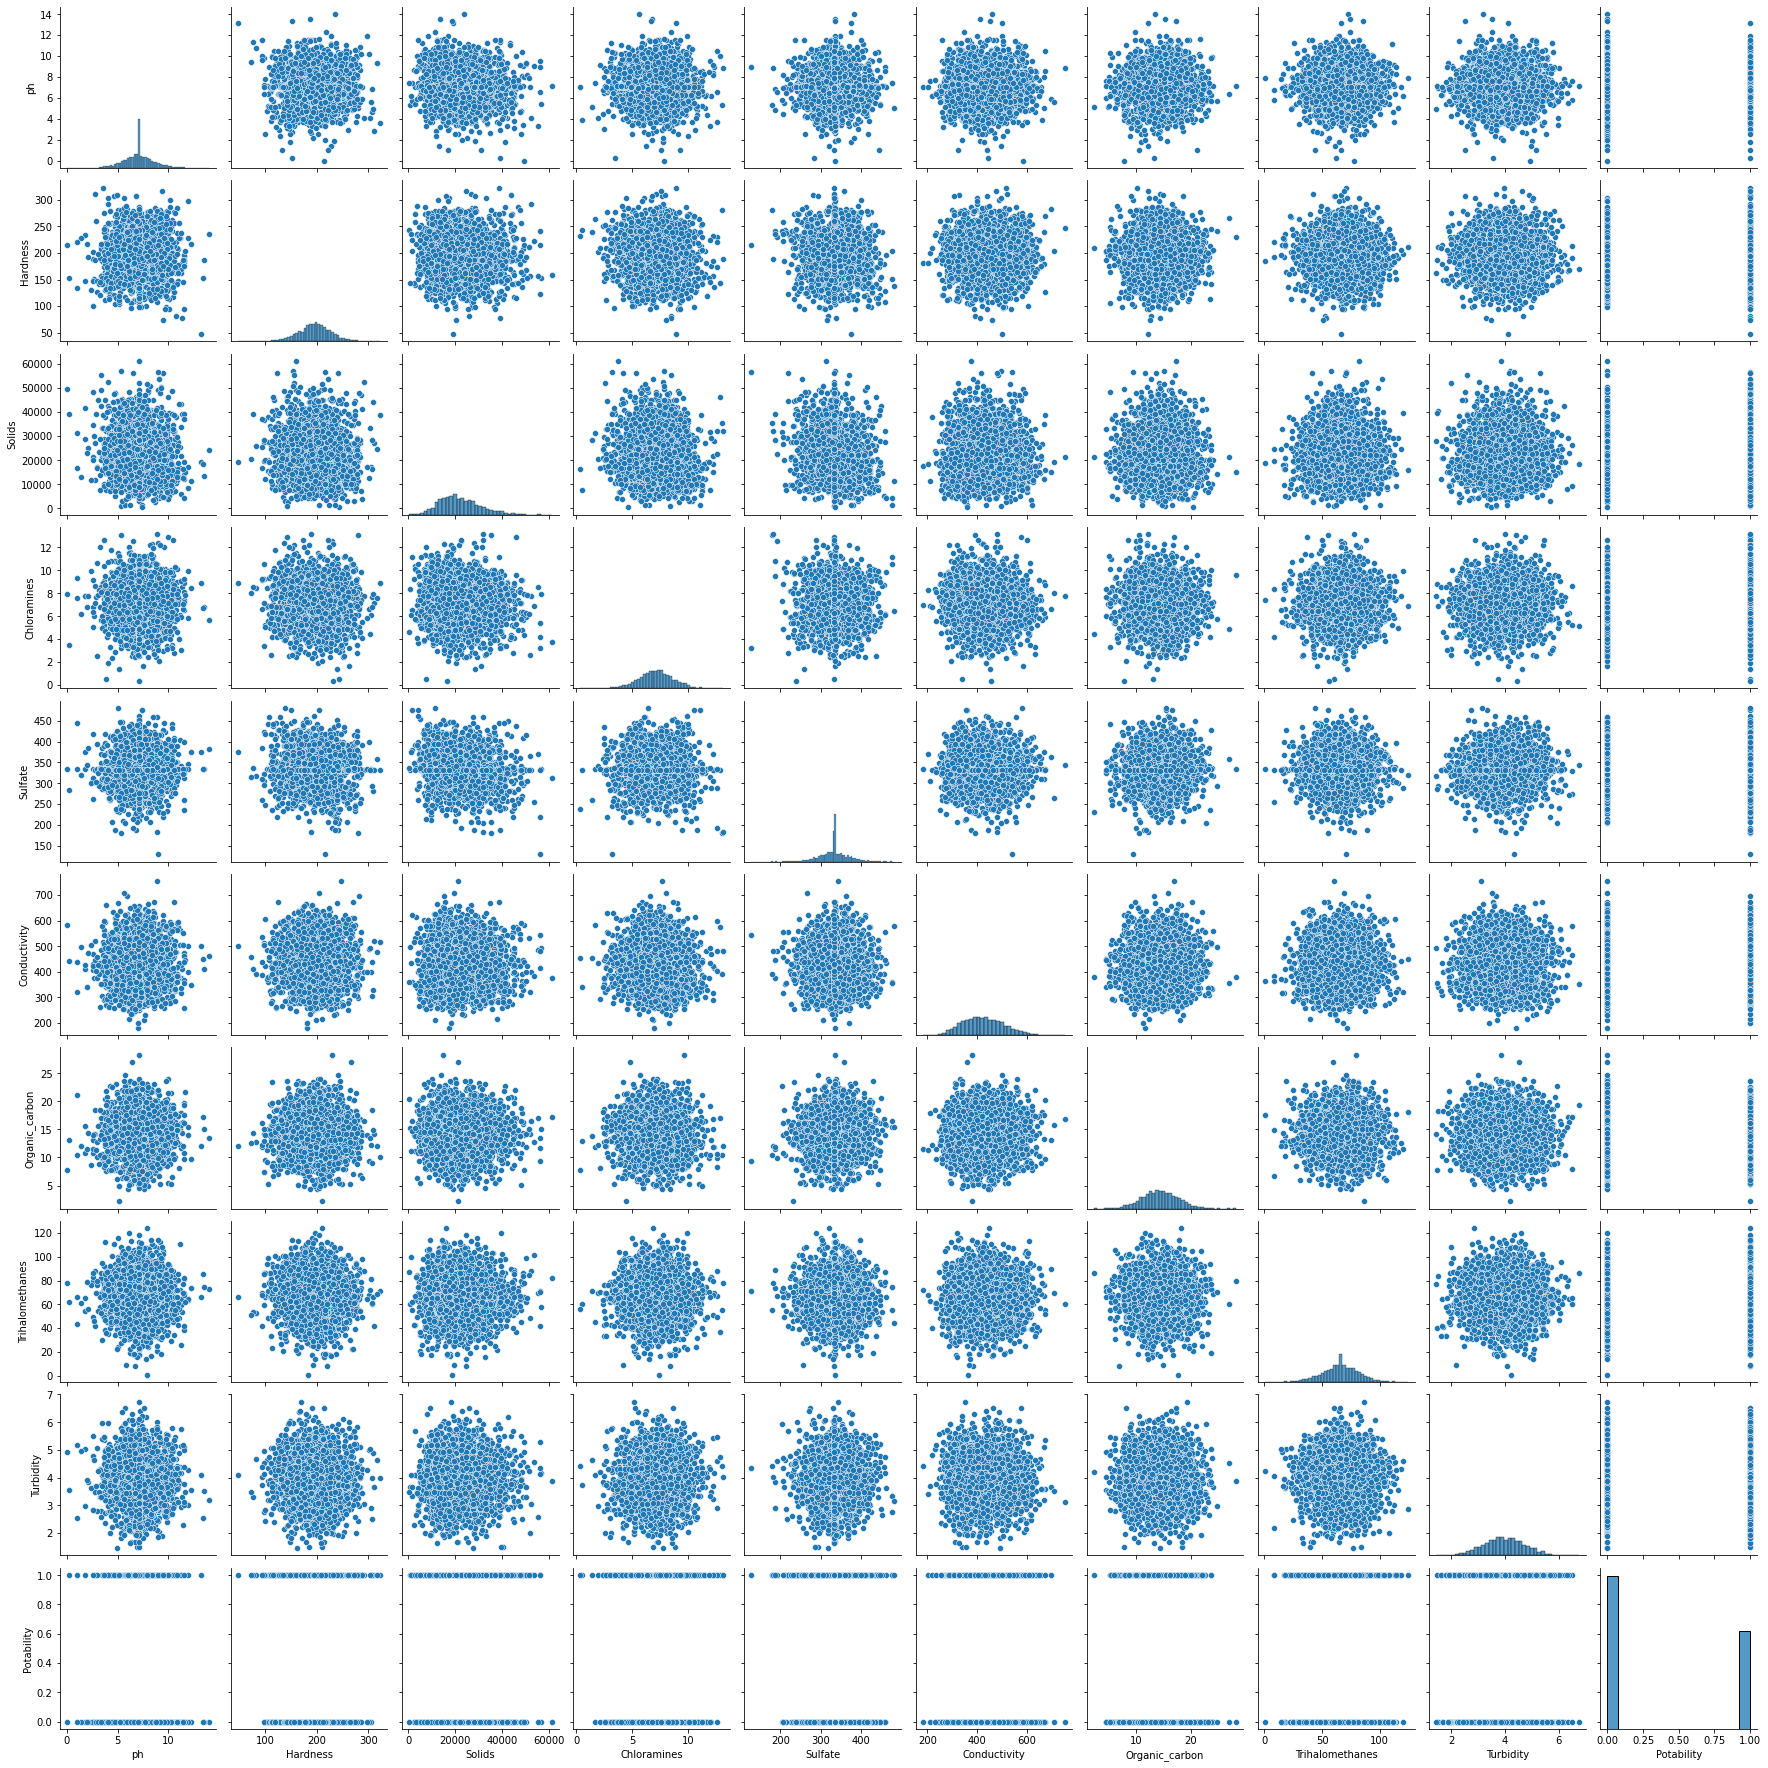

In [11]:
#check for the relationship between variables
sns.pairplot(df)

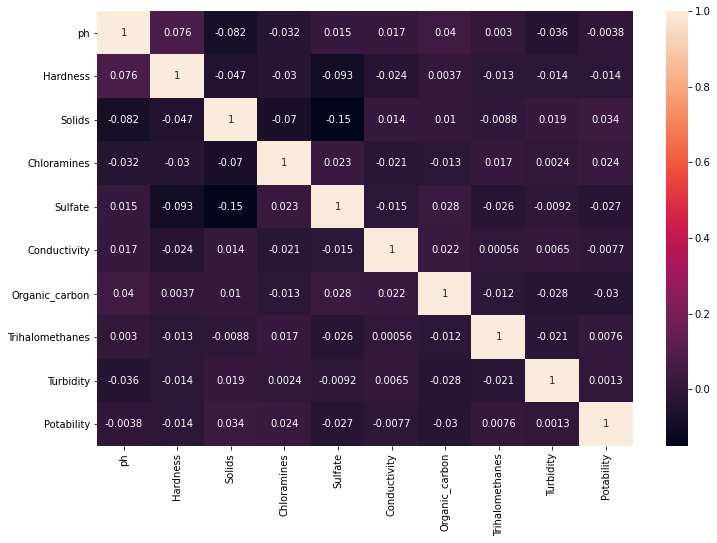

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

#PREPARING THE DATA FOR MODELLING

In [13]:
#split data into independent (x) and target variables (y)
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, precision_score
modelAccuracy = list()

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=3)

model.fit(X_train,y_train)
RFC = model.predict(X_test)

RFC_accuracy = accuracy_score(RFC,y_test)
RFC_accuracy

0.7304170905391658

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       611
           1       0.93      0.31      0.46       372

    accuracy                           0.73       983
   macro avg       0.82      0.65      0.64       983
weighted avg       0.79      0.73      0.69       983

None


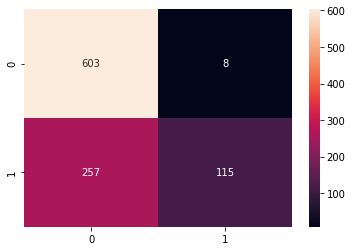

In [17]:
print('Random Forest Classifier\n')
print(metrics.classification_report(y_test, RFC))
print(modelAccuracy.append(metrics.accuracy_score(y_test, RFC)))

sns.heatmap(confusion_matrix(y_test, RFC), annot=True, fmt='d')
plt.show()

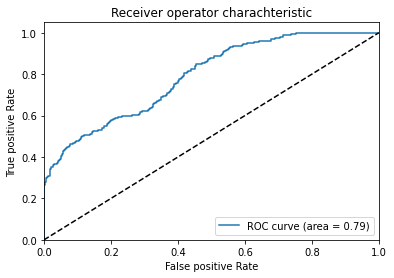

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

y_predicted_prob = model.predict_proba(X_test)
fpr, tpr ,thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr) #computing area under the curve

plt.figure()
lw = 5 #plot function for curving
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver operator charachteristic')
plt.legend(loc='lower right')

In [19]:
!pip install catboost

from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

     |████████████████████████████████| 69.2 MB 4.7 kB/s 


In [20]:
model_1 = XGBClassifier(n_estimators=100, max_depth=3, random_state=50)

model_1.fit(X_train,y_train)
XGB = model_1.predict(X_test)

XGB_accuracy = accuracy_score(XGB,y_test)
XGB_accuracy

0.8016276703967447

XGBClassifier

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       611
           1       0.85      0.58      0.69       372

    accuracy                           0.80       983
   macro avg       0.82      0.76      0.77       983
weighted avg       0.81      0.80      0.79       983

None


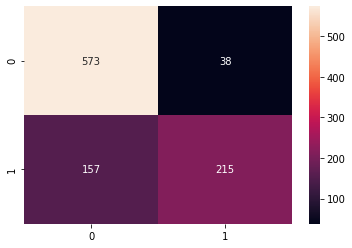

In [21]:
print('XGBClassifier\n')
print(metrics.classification_report(y_test, XGB))
print(modelAccuracy.append(metrics.accuracy_score(y_test, XGB)))

sns.heatmap(confusion_matrix(y_test, XGB), annot=True, fmt='d')
plt.show()

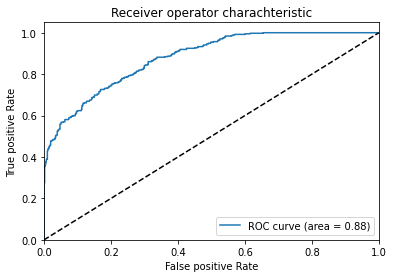

In [22]:
y_predicted_prob = model_1.predict_proba(X_test)
fpr, tpr ,thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr) #computing area under the curve

plt.figure()
lw = 5 #plot function for curving
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver operator charachteristic')
plt.legend(loc='lower right')

In [23]:
model_2 = CatBoostClassifier(n_estimators=100, max_depth=3, random_state=3)

model_2.fit(X_train,y_train)
CBC = model_2.predict(X_test)

CBC_accuracy = accuracy_score(CBC,y_test)
CBC_accuracy

Learning rate set to 0.121268
0:	learn: 0.6687013	total: 51.6ms	remaining: 5.11s
1:	learn: 0.6503586	total: 53.4ms	remaining: 2.62s
2:	learn: 0.6328866	total: 54.9ms	remaining: 1.77s
3:	learn: 0.6175241	total: 56.3ms	remaining: 1.35s
4:	learn: 0.6044077	total: 57.7ms	remaining: 1.1s
5:	learn: 0.5939095	total: 59.2ms	remaining: 927ms
6:	learn: 0.5873636	total: 60.7ms	remaining: 807ms
7:	learn: 0.5762344	total: 62.2ms	remaining: 715ms
8:	learn: 0.5736460	total: 63.6ms	remaining: 643ms
9:	learn: 0.5651346	total: 65.1ms	remaining: 586ms
10:	learn: 0.5587991	total: 66.5ms	remaining: 538ms
11:	learn: 0.5530351	total: 67.9ms	remaining: 498ms
12:	learn: 0.5452897	total: 69.3ms	remaining: 464ms
13:	learn: 0.5413847	total: 70.8ms	remaining: 435ms
14:	learn: 0.5361098	total: 72.2ms	remaining: 409ms
15:	learn: 0.5327143	total: 73.6ms	remaining: 386ms
16:	learn: 0.5307366	total: 75ms	remaining: 366ms
17:	learn: 0.5293939	total: 76.4ms	remaining: 348ms
18:	learn: 0.5264244	total: 77.9ms	remaining: 3

0.797558494404883

CatBoostClassifier

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       611
           1       0.86      0.56      0.68       372

    accuracy                           0.80       983
   macro avg       0.82      0.75      0.76       983
weighted avg       0.81      0.80      0.79       983

None


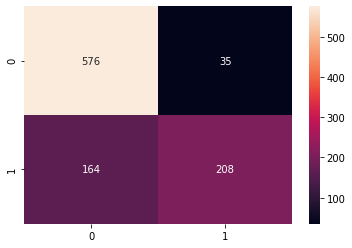

In [24]:
print('CatBoostClassifier\n')
print(metrics.classification_report(y_test, CBC))
print(modelAccuracy.append(metrics.accuracy_score(y_test, CBC)))

sns.heatmap(confusion_matrix(y_test, CBC), annot=True, fmt='d')
plt.show()

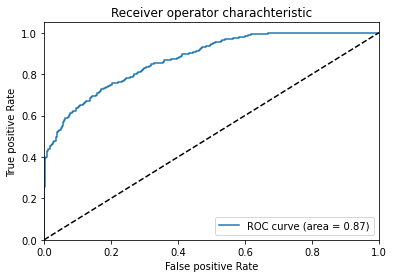

In [25]:
y_predicted_prob = model_2.predict_proba(X_test)
fpr, tpr ,thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr) #computing area under the curve

plt.figure()
lw = 5 #plot function for curving
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver operator charachteristic')
plt.legend(loc='lower right')

In [26]:
from sklearn.tree import DecisionTreeClassifier
 
model_3 = DecisionTreeClassifier()
 
model_3.fit(X_train,y_train)
DTC = model_3.predict(X_test)
 
DTC_accuracy = accuracy_score(DTC,y_test)
DTC_accuracy

0.7324516785350966

DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       611
           1       0.64      0.66      0.65       372

    accuracy                           0.73       983
   macro avg       0.72      0.72      0.72       983
weighted avg       0.73      0.73      0.73       983

None


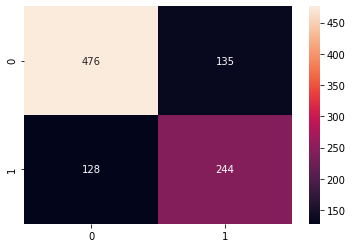

In [27]:
print('DecisionTreeClassifier\n')
print(metrics.classification_report(y_test, DTC))
print(modelAccuracy.append(metrics.accuracy_score(y_test, DTC)))
 
sns.heatmap(confusion_matrix(y_test, DTC), annot=True, fmt='d')
plt.show()

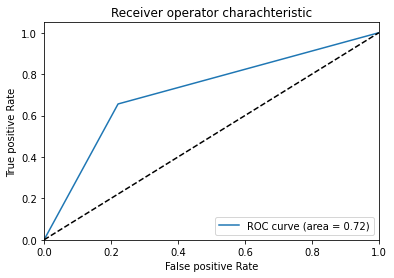

In [28]:
y_predicted_prob = model_3.predict_proba(X_test)
fpr, tpr ,thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr) #computing area under the curve

plt.figure()
lw = 5 #plot function for curving
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver operator charachteristic')
plt.legend(loc='lower right')

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

model_4 = GradientBoostingClassifier()

model_4.fit(X_train,y_train)
GBC = model_4.predict(X_test)

GBC_accuracy = accuracy_score(GBC,y_test)
GBC_accuracy

0.762970498474059

GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       611
           1       0.80      0.50      0.62       372

    accuracy                           0.76       983
   macro avg       0.77      0.71      0.72       983
weighted avg       0.77      0.76      0.75       983

None


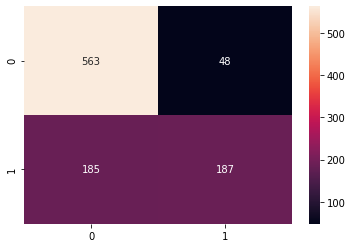

In [30]:
print('GradientBoostingClassifier\n')
print(metrics.classification_report(y_test, GBC))
print(modelAccuracy.append(metrics.accuracy_score(y_test, GBC)))

sns.heatmap(confusion_matrix(y_test, GBC), annot=True, fmt='d')
plt.show()

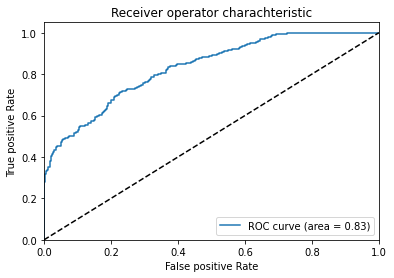

In [31]:
y_predicted_prob = model_4.predict_proba(X_test)
fpr, tpr ,thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr) #computing area under the curve

plt.figure()
lw = 5 #plot function for curving
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver operator charachteristic')
plt.legend(loc='lower right')